# SPAM EMAIL DETECTOR USING NAIVE BAYES

In [1]:
import pandas as pd
import numpy as np
import itertools 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


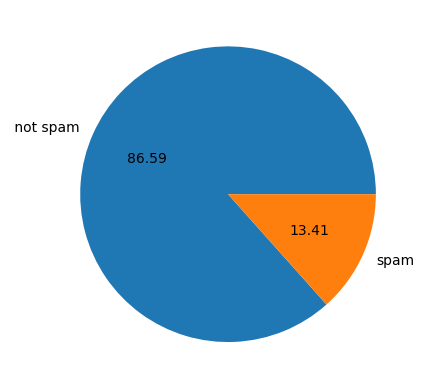

In [5]:
plt.pie(df['Category'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.25 )

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)

In [8]:
v2 = CountVectorizer(analyzer ='word', ngram_range = (1,2))
x_train_count = v2.fit_transform(x_train.values)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, ax=None):
    """
    This function prints and plots the confusion matrix.
    Set `normalize=True` for normalized values.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if ax is None:
        ax = plt.gca()

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    fig = ax.get_figure()
    cbar = fig.colorbar(im)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.6f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.figure.tight_layout()

    return ax


In [10]:
clf_mb = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,1))),
    ("nb", MultinomialNB())
])
clf_mb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [11]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf_mb.predict(emails)

array([0, 1])

In [12]:
y_pred1 = clf_mb.predict(x_test)

In [13]:
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred1))

Accuracy score of Multinomial NB is:  0.9877961234745154
Confusion Matrix of Multinomial NB is:  [[1199    9]
 [   8  177]]
Precision score of the Multinomial NB is 0.9516129032258065


In [14]:
clf_mb2 = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,2))),
    ("nb", MultinomialNB())
])
clf_mb2.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [15]:
y_pred2 = clf_mb2.predict(x_test)

In [16]:
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9885139985642498
Confusion Matrix of Multinomial NB is:  [[1205    3]
 [  13  172]]
Precision score of the Multinomial NB is 0.9828571428571429


In [17]:
clf_mb3 = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,3))),
    ("nb", MultinomialNB())
])
clf_mb3.fit(x_train, y_train)
y_pred3 = clf_mb3.predict(x_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred3))

Accuracy score of Multinomial NB is:  0.9885139985642498
Confusion Matrix of Multinomial NB is:  [[1206    2]
 [  14  171]]
Precision score of the Multinomial NB is 0.9884393063583815


In [18]:
clf_bb = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,1))),
    ("nb", BernoulliNB())
])
clf_bb.fit(x_train, y_train)
y_pred4 = clf_bb.predict(x_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred4))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred4))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred4))

Accuracy score of Bernoulli NB is:  0.9763101220387652
Confusion Matrix of Bernoulli NB is:  [[1207    1]
 [  32  153]]
Precision score of the Bernoulli NB is 0.9935064935064936


In [19]:
clf_bb1 = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,2))),
    ("nb", BernoulliNB())
])
clf_bb1.fit(x_train, y_train)
y_pred5 = clf_bb1.predict(x_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred5))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred5))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred5))

Accuracy score of Bernoulli NB is:  0.9375448671931084
Confusion Matrix of Bernoulli NB is:  [[1208    0]
 [  87   98]]
Precision score of the Bernoulli NB is 1.0


In [20]:
clf_bb2 = Pipeline([
    ("vectorizer", CountVectorizer(analyzer ='word', ngram_range = (1,3))),
    ("nb", BernoulliNB())
])
clf_bb2.fit(x_train, y_train)
y_pred6 = clf_bb2.predict(x_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred6))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred6))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred6))

Accuracy score of Bernoulli NB is:  0.9210337401292176
Confusion Matrix of Bernoulli NB is:  [[1208    0]
 [ 110   75]]
Precision score of the Bernoulli NB is 1.0


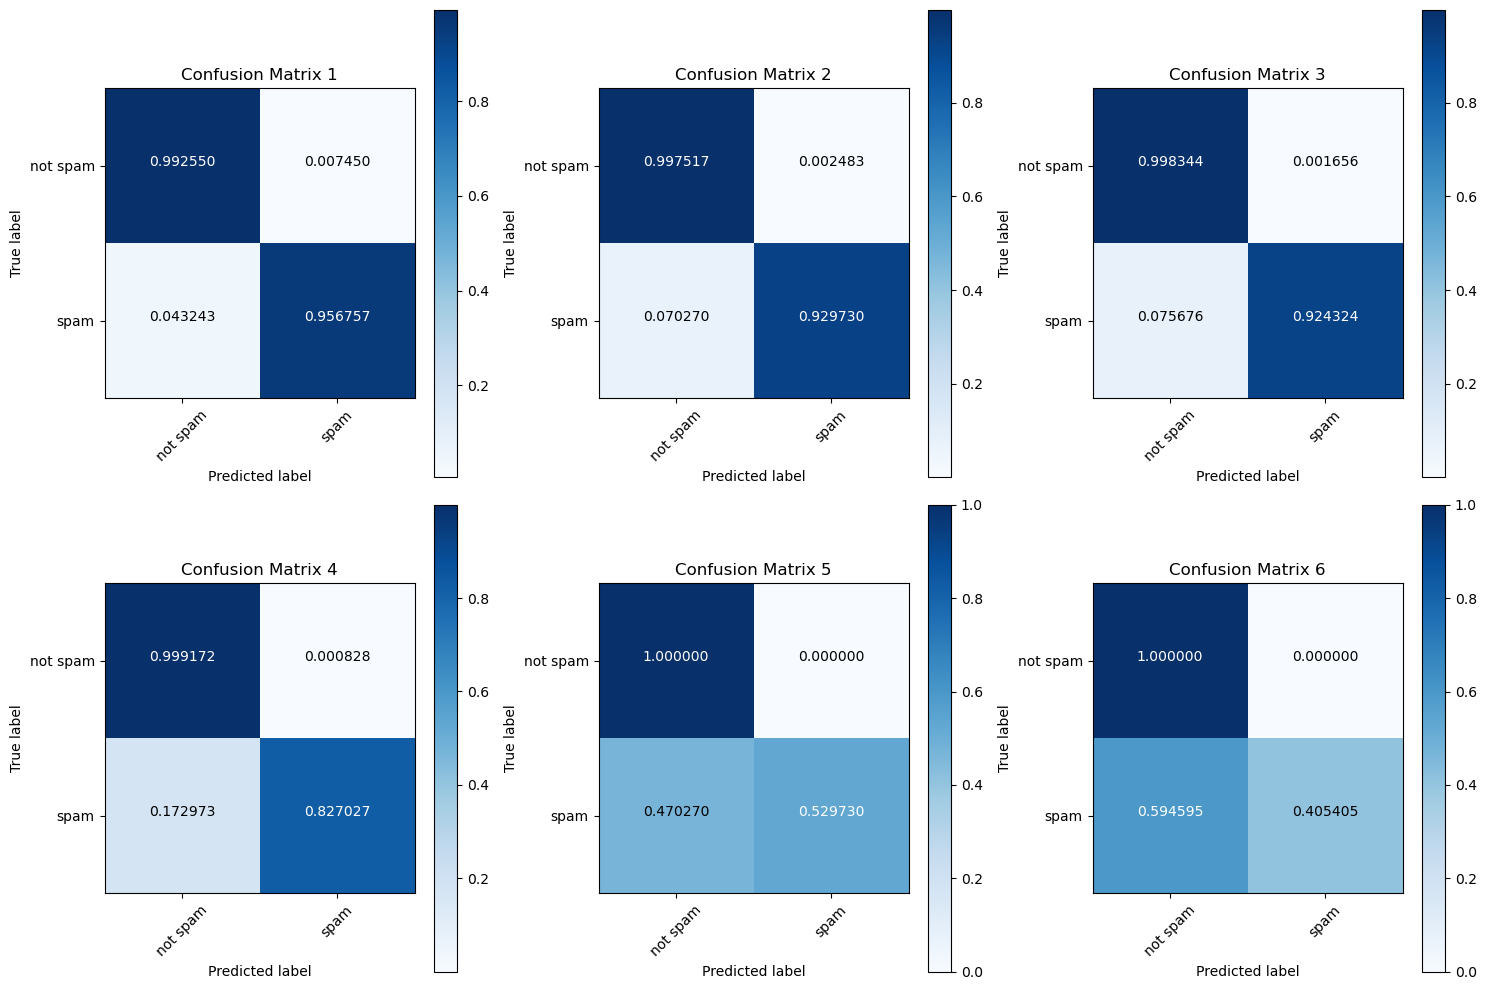

In [22]:
y_pred_list = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
class_labels=["not spam", "spam"]

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot six confusion matrices with different y_pred values
for i, y_pred in enumerate(y_pred_list):
    ax = axes[i // 3, i % 3]

    # Calculate the confusion matrix for the current y_pred
    cm = confusion_matrix(y_test, y_pred)

    # Call your plot_confusion_matrix function
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title=f'Confusion Matrix {i+1}', ax=ax)

plt.tight_layout()
plt.show()

ROW1 : Multinomial naive bayes  <br>
ROW2 : Bernoulli naive bayes <br>
Conclusion : Multinomial naive bayes is better than the bernoulli naive bayes in the above spam deterctor example.